In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Breast+Cancer+Classification+Data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

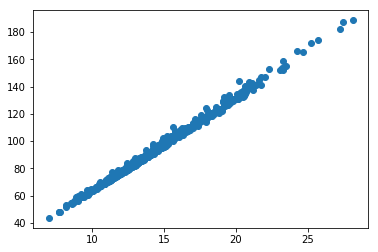

In [5]:
plt.scatter(df['radius_mean'],df['perimeter_mean'])

In [6]:
df['radius_mean'].corr(df['perimeter_mean'])

0.9978552814938109

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


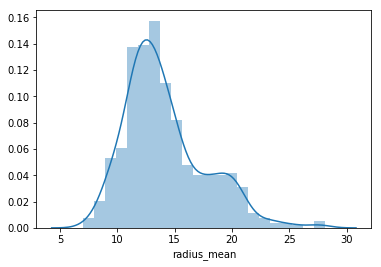

In [9]:
sns.distplot(df['radius_mean'])

In [10]:
#import decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

In [11]:
tree= DecisionTreeClassifier()

In [12]:
#split the data into train and split
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [14]:
x=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=123)

In [21]:
tree.fit(x_train,y_train)
y_pred=tree.predict(x_test)

In [23]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.9415204678362573

In [24]:
metrics.confusion_matrix(y_test,y_pred)

array([[99,  4],
       [ 6, 62]], dtype=int64)

In [25]:
rf=RandomForestClassifier()

In [26]:
model_rf=rf.fit(x_train,y_train)

In [27]:
pred_rf=rf.predict(x_test)

In [28]:
metrics.accuracy_score(y_test,pred_rf)

0.9707602339181286

In [29]:
#wine quality data
df2=pd.read_csv('Wine+Quality+Prediction.csv')
df2.head()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,Good,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,Good,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,Good,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,Good,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,Good,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [31]:
df2.shape

(4898, 12)

In [34]:
x2=df2.drop('quality',axis=1)
y2=df2['quality']

In [35]:
tree_wine=DecisionTreeClassifier()

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=0.30,random_state=123)

In [38]:
tree_wine.fit(x_train,y_train)
y_pred2=tree_wine.predict(x_test)

In [39]:
metrics.accuracy_score(y_test,y_pred2)

0.7768707482993197

In [40]:
rf2=RandomForestClassifier()

In [42]:
wine_rf=rf2.fit(x_train,y_train)

In [43]:
y_pred3=rf2.predict(x_test)

In [44]:
metrics.accuracy_score(y_test,y_pred3)

0.8068027210884354

In [106]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred4=lr.predict(x_test)

In [107]:
metrics.accuracy_score(y_test,y_pred4)

0.7489795918367347

In [104]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred5=knn.predict(x_test)

In [105]:
metrics.accuracy_score(y_test,y_pred5)

0.6972789115646258

In [88]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred5=nb.predict(x_test)

In [89]:
metrics.accuracy_score(y_test,y_pred5)

0.717687074829932

In [97]:
#voting classifier as Ensemble method
from sklearn.ensemble import VotingClassifier

In [101]:
vc=VotingClassifier(estimators=[('KNN',knn),('Decision Tree',tree_wine),('Random forest',rf2),('log_reg',lr)],voting='soft')

In [102]:
vc.fit(x_train,y_train)
y_pred6=vc.predict(x_test)

In [103]:
metrics.accuracy_score(y_test,y_pred6)

0.8115646258503402

# Bagging

In [112]:
from sklearn.ensemble import BaggingClassifier
bagg=BaggingClassifier()
model_bagg=bagg.fit(x_train,y_train)
pred_bagg=bagg.predict(x_test)

In [113]:
metrics.accuracy_score(y_test,pred_bagg)

0.8040816326530612

# Cross validation

In [114]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [115]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [116]:
x=df.drop('diagnosis',axis=1)
y=df['diagnosis']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=123)

In [117]:
tree=DecisionTreeClassifier(random_state=123)
rf=RandomForestClassifier(random_state=123)

In [122]:
#cross val score for tree
cross_val_score(tree,x,y,scoring='accuracy',cv=10).mean()

0.9123303949528994

In [123]:
#cross val score for rf
cross_val_score(rf,x,y,scoring='accuracy',cv=10).mean()

0.9579185031544377

In [126]:
#cross val score for logistic regression
lr=LogisticRegression(random_state=123)
cross_val_score(lr,x,y,scoring='accuracy',cv=5).mean()

0.6414928818776452

In [128]:
#cross val score for knn
knn=KNeighborsClassifier()
cross_val_score(knn,x,y,scoring='accuracy',cv=10).mean()

0.2780496499870365

In [129]:
#cross val score for naive bayes
nb=GaussianNB()
cross_val_score(nb,x,y,scoring='accuracy',cv=10).mean()

0.6204077002851957

# Model scores

#### Decision tree = 0.9123303949528994
#### Random forest = 0.9579185031544377
#### Logistic regression = 0.6414928818776452
#### KNN = 0.2780496499870365
#### KNN and Logistic regression = 0.45555915651196954
#### Random forest and KNN = 0.7003575749719126
#### decision tree and knn = 0.6704671160660272
#### KNN, Tree and Random forest = 0.9228577910292973
#### KNN,Logistic regression, Random forest and Tree = 0.8959478437472992
#### Decision Tree and Logistic regression = 0.8835742373174315

In [130]:
from sklearn.ensemble import VotingClassifier
vc1=VotingClassifier(estimators=[('KNN',knn),('log_reg',lr)],voting='hard')
cross_val_score(vc1,x,y,scoring='accuracy',cv=10).mean()

0.45555915651196954

In [131]:
vc2=VotingClassifier(estimators=[('Random foresr',rf),('KNN',knn)],voting='hard')
cross_val_score(vc2,x,y,scoring='accuracy',cv=10).mean()

0.7003575749719126

In [132]:
vc3=VotingClassifier(estimators=[('Decision tree',tree),('KNN',knn)],voting='hard')
cross_val_score(vc3,x,y,scoring='accuracy',cv=10).mean()

0.6704671160660272

In [134]:
vc4=VotingClassifier(estimators=[('Decision tree',tree),('KNN',knn),('Random forest',rf)],voting='hard')
cross_val_score(vc4,x,y,scoring='accuracy',cv=10).mean()

0.9228577910292973

In [135]:
vc5=VotingClassifier(estimators=[('Decision tree',tree),('KNN',knn),('Random forest',rf),('Logistic',lr)],voting='hard')
cross_val_score(vc5,x,y,scoring='accuracy',cv=10).mean()

0.8959478437472992

In [136]:
vc6=VotingClassifier(estimators=[('Decision tree',tree),('Logistic',lr)],voting='hard')
cross_val_score(vc6,x,y,scoring='accuracy',cv=10).mean()

0.8835742373174315

# Parameter tuning

In [138]:
#parameter tuning of the decision tree
tree_param={
    'criterion' :['gini','entropy'],
    'splitter' : ['best','random'],
    'max_depth' : [3,4,5,6],
    'max_features':['auto','sqrt','log2'],
    'random_state': [123]
}

In [140]:
grid = GridSearchCV(tree, tree_param,cv=5)

In [141]:
cross_val_score(grid,x,y,cv=5,scoring='accuracy').mean()

0.844509426702578

In [142]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)

In [143]:
#decision tree
tree=DecisionTreeClassifier()
model_tree=tree.fit(x_train,y_train)
pred_tree=tree.predict(x_test)

In [144]:
metrics.accuracy_score(y_test,pred_tree)

0.9532163742690059

In [145]:
#decision tree using grid
model_grid=grid.fit(x_train,y_train)
pred_grid=grid.predict(x_test)

In [146]:
metrics.accuracy_score(y_test,pred_grid)

0.9298245614035088

# Parameter tuning of random forest

In [147]:
#tuning of random forest
rf_param={
    'n_estimators': [25,50,100],
    'criterion' :['gini','entropy'],
    'max_depth' : [3,4,5,6],
    'max_features':['auto','sqrt','log2'],
    'random_state': [123]
}

In [149]:
rf_grid=GridSearchCV(rf,rf_param,cv=5)

In [150]:
cross_val_score(rf_grid,x,y,scoring='accuracy',cv=5)

array([0.93913043, 0.94782609, 0.98230088, 0.98230088, 0.96460177])

# Boosting

In [151]:
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier

In [156]:
#Define the parameters of Bagging and Adaboost
bagging={
    'bootstrap':[True,False],
    'oob_score':[True,False],
    'random_state':[123]
}

In [169]:
bagg=BaggingClassifier()

In [188]:
grid_lg=GridSearchCV(bagg,bagging,cv=10)

In [189]:
grid_lg

GridSearchCV(cv=10, error_score='raise',
       estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'bootstrap': [True, False], 'oob_score': [True, False], 'random_state': [123]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [172]:
bagg.fit(x_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [173]:
metrics.accuracy_score(y_test,bagg.predict(x_test))

0.9766081871345029

In [191]:
#lets apply boosting
ada=AdaBoostClassifier(algorithm='SAMME',learning_rate=1.0,n_estimators=100,random_state=123)
import warnings; warnings.simplefilter('ignore')

In [176]:
#finding the parameters of adaboost
boostparam={
    'n_estimators':[50,75,100],
    'learning_rate':[1,2,3,4,5],
    'algorithm':['SAMME','SAMME.R'],
    'random_state':[123]
}

In [183]:
grid_boost=GridSearchCV(ada,boostparam,cv=10)

In [184]:
grid_boost.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 75, 100], 'learning_rate': [1, 2, 3], 'algorithm': ['SAMME', 'SAMME.R'], 'random_state': [123]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [190]:
grid_boost.best_params_

{'algorithm': 'SAMME',
 'learning_rate': 1,
 'n_estimators': 100,
 'random_state': 123}

In [192]:
ada.fit(x_train,y_train)
ada_pred=ada.predict(x_test)

In [193]:
metrics.accuracy_score(y_test,ada_pred)

0.9824561403508771